<h1>Linear Regression with one parameter</h1>

The objective of this Notebook is to show the most basic linear regression to understand how a model works.

This project comprises:

<ul>
    <li> Data creation</li>
    <li> Model creation</li>
    <li> Hyperparameter and parameter definition</li>
    <li> Model Training</li>
    <ul>
        <li> Illustration of how the parameter change</li>
        <li> And how the predictions adjust to the true data</li>
    </ul>
</ul>

Required libraries

In [ ]:
import torch 
import matplotlib.pyplot as plt

The following function visualizes both the parameter space and data space during training.

In [133]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        print(type(X.numpy()))
        self.X = X.numpy()
       
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())#, 'ro')
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        # Convert lists to PyTorch tensors
        parameter_values_tensor = torch.tensor(self.parameter_values)
        loss_function_tensor = torch.tensor(self.Loss_function)

        # Plot using the tensors
        plt.plot(parameter_values_tensor.numpy(), loss_function_tensor.numpy())
  
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

<h2 id="Makeup_Data">Data creation</h2>

The line f is defined, with noise added to generate data Y.

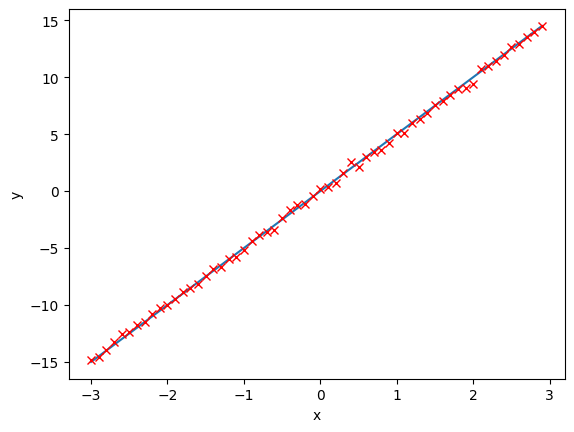

In [134]:


X = torch.arange(-3,3,0.1).view(-1,1)

# Create f(X) with slope 5
f = 5 * X

#Adding noise to f(X)
Y = f + 0.2*torch.randn(X.size())

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.plot(X.numpy(), Y.numpy(),'rx', label = 'Y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



<h2 id="Makeup_Data">Model creation</h2>

The forward function is defined to make the prediction (or yhat). 

The criterion function uses the Mean Square Error (MSE) to compute the error or cost between the prediction (yhat) and the actual values (y).

In [135]:
# Create forward function for prediction

def forward(x):
    return w*x

#Create the cost function, this is MSE(Mean Square Error)

def criterion(yhat,y):
    return torch.mean((yhat - y)**2)


<h2 id="Makeup_Data">Hyperparameter and parameter definition</h2>

The learning rate defines how much of the computed gradient will be taken, and used to update the parameter w.

The parameter w is defined, and requires_grad is set to True to enable learning.

In [136]:
lr = 0.1
LOSS = []

w = torch.tensor(-10.0, requires_grad=True)

For parameter and data visualization, the following function is created.

In [ ]:
gradient_plot = plot_diagram(X, Y, w, stop = 21)

<class 'numpy.ndarray'>



<h2 id="Makeup_Data">Model training</h2>

The function train_model is created and shows step by step the information processing. This is, the order in which the forward function, the loss function, the gradient computation, and gradient update are carry out.

Additionally, for each epoch the loss is drew in the parameter space, and can be observed how it is minimized. 

Moreover, the prediction is also depicted for each epoch, and can be seee the adjustment to the true data.


In [ ]:
# Create a function for model training

def train_model(epochs):
    for epoch in range(epochs):

        # get the prediction yhat from X
        Yhat = forward(X)

        # Compute the error yhat-y
        loss = criterion(Yhat,Y)

        #Plot the changes of w and yhat in the parameter space and data space, respectively.
        gradient_plot(Yhat, w, loss.item(), epoch)

        # Recording loss
        LOSS.append(loss.item())

        # Compute the gradient of all params considering the current loss.
        # gradient is computed as follows: l(w) = (y - yhat)**2 = (y - w*x)**2 
        #l'(w) = 2 (y - w*x)*x -> the derivative
        # 0 = 2 (y - w*x)*x -> w = x / y ###The derivative for instant 0
        loss.backward()

        # parameter update
        w.data = w.data - lr*w.grad.data

        # cleaning the grad for the next iteration.
        w.grad.zero_()



Running the training for 4 epochs


/var/folders/n0/kyj1q0vd3zzgnk3tpnk8sfr80000gn/T/ipykernel_71173/3532786250.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


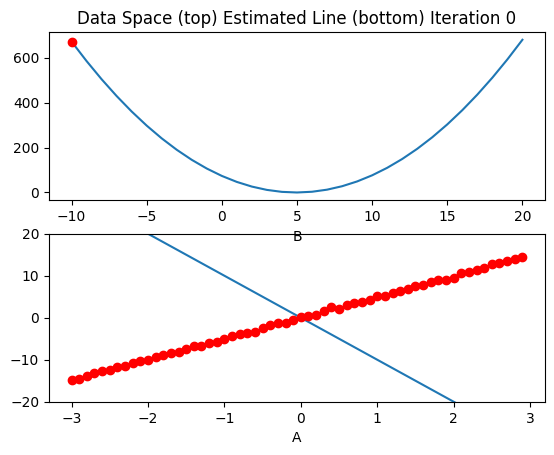

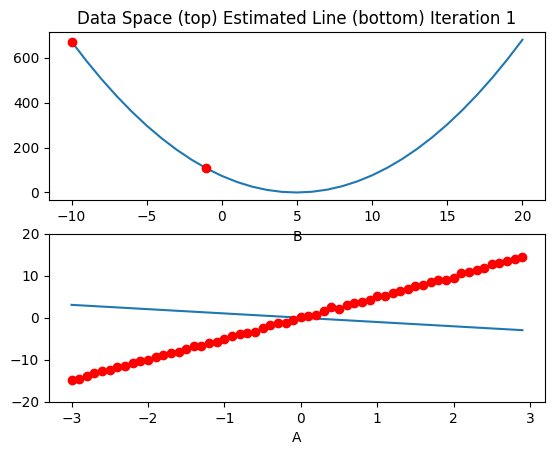

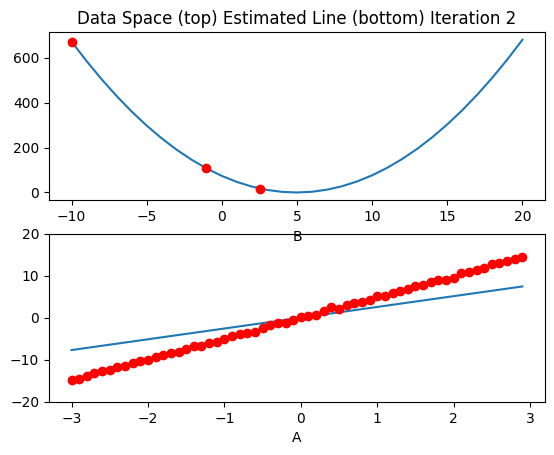

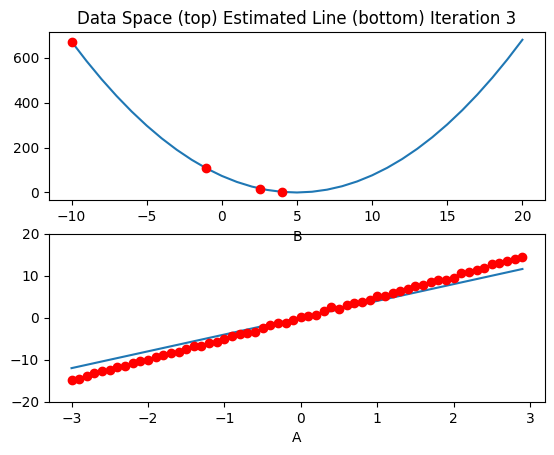

<Figure size 640x480 with 0 Axes>

In [139]:

train_model(4)

Finally, the error is plotted for each iteration/epoch.

Text(0, 0.5, 'Cost')

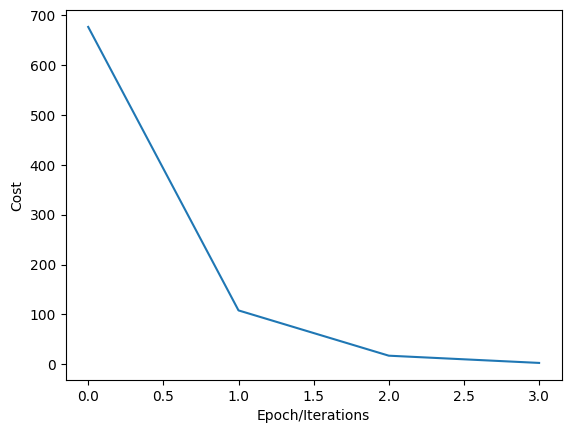

In [87]:
plt.plot(LOSS)
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")